# Firm profits

1. simulate firm profits 
2. collect stylized facts
3. replicate stylized facts

In [36]:
%matplotlib inline
from stockmarket.firms import Firm
from numpy.testing import assert_equal
from stockmarket import setup
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import decimal
import scipy.linalg
import numpy.random as nrand

In [5]:
time = 100
brownian_delta = 0.25
gbm_mu = 0.02
brownian_sigma = 0.1
mean_arr = 0.04
drift_alpha = 0.02
drift_mu = 0.03
accountingRateOfReturn = [mean_arr]

In [26]:
# Bottazzi & Secchi  find a autoregressive coefficient of 0.0621 and standard error of 0.0140
sqrt_delta_sigma = math.sqrt(brownian_delta) * brownian_sigma
brownian_motion = nrand.normal(loc=0, scale=sqrt_delta_sigma)
sigma_pow_mu_delta = (gbm_mu - 0.5 * math.pow(brownian_sigma, 2.0)) * brownian_delta
print(nrand.normal(loc=0, scale=sqrt_delta_sigma) + sigma_pow_mu_delta)

0.021841616049251576


# Geometric brownian motion

In [44]:
initial_profit=1000
all_r0=0.5
all_time=800
all_delta=0.00396825396
all_sigma=0.125
gbm_mu=0.058
jumps_lamda=0.00125
jumps_sigma=0.001
jumps_mu=-0.2
cir_a=3.0
cir_mu=0.5
cir_rho=0.5
ou_a=3.0
ou_mu=0.5
heston_a=0.25
heston_mu=0.35
heston_vol0=0.06125

In [46]:
#geometric_brownian_motion_levels(mp)
# first get brownian motion log_returns
sqrt_delta_sigma = math.sqrt(all_delta) * all_sigma
# store as wiener_process in array size of time
wiener_process = np.array(nrand.normal(loc=0, scale=sqrt_delta_sigma, size=all_time))
sigma_pow_mu_delta = (gbm_mu - 0.5 * math.pow(all_sigma, 2.0)) * all_delta
geometric_brownian_motion_log_returns = wiener_process + sigma_pow_mu_delta
#convert_to_prices(param, geometric_brownian_motion_log_returns(param))
# convert to price
# first convert from log_returns to actual returns 
returns = numpy.exp(geometric_brownian_motion_log_returns)

# A sequence of prices starting with initial_profit
price_sequence = [initial_profit]
for i in range(1, len(returns)):
    # Add the price at t-1 * return at t
    price_sequence.append(price_sequence[i - 1] * returns[i - 1])
profits = numpy.array(price_sequence)

In [79]:
def determine_profit(previous_profit, all_delta, all_sigma, all_time, gbm_mu):
    """Determines the next profit according to a geometric brownian motion"""
    sqrt_delta_sigma = math.sqrt(all_delta) * all_sigma
    brownian_motion = nrand.normal(loc=0, scale=sqrt_delta_sigma)
    sigma_pow_mu_delta = (gbm_mu - 0.5 * math.pow(all_sigma, 2.0)) * all_delta
    geometric_brownian_motion_log_return = brownian_motion + sigma_pow_mu_delta
    retur = numpy.exp(geometric_brownian_motion_log_return)
    nextProfit = previous_profit * retur
    return nextProfit

# Mean reverting stochastic process

In [4]:
def determine_arr(accountingRateOfReturn, brownian_delta, brownian_sigma, mean_arr, drift_alpha, drift_mu):
    # random component through brownian motion
    sqrt_delta_sigma = math.sqrt(brownian_delta) * brownian_sigma
    brownian_motion = nrand.normal(loc=0, scale=sqrt_delta_sigma)
    randomness = math.sqrt(accountingRateOfReturn[-1]) * brownian_motion
    # drift component
    drift = drift_alpha * (drift_mu * accountingRateOfReturn[-1]) * brownian_delta
    return accountingRateOfReturn[-1] + drift + randomness

In [78]:
determine_arr(accountingRateOfReturn, brownian_delta, brownian_sigma, mean_arr, drift_alpha, drift_mu)

0.04037454633575528

In [47]:
time = 100
brownian_delta = 0.25
brownian_sigma = 0.1
mean_arr = 0.04
drift_alpha = 0.02
drift_mu = 0.03
# brownian motion
sqrt_delta_sigma = math.sqrt(brownian_delta) * brownian_sigma

#brownian_motion = nrand.normal(loc=0, scale=sqrt_delta_sigma, size=time)


In [48]:
drift = drift_alpha * (drift_mu * accountingRateOfReturn[-1]) * brownian_delta

In [59]:
brownian_motion = nrand.normal(loc=0, scale=sqrt_delta_sigma)
randomness = math.sqrt(levels[-1]) * brownian_motion
levels.append(levels[-1] + drift + randomness)

In [38]:
all_sigma = 0.01
all_delta = 0.02
all_time = 20
cir_a = 0.02
cir_mu = 0.03
all_r0 = 0.04

In [39]:
#cox_ingersoll_ross_levels

# set-up brownian motion
sqrt_delta_sigma = math.sqrt(all_delta) * all_sigma
brownian_motion = nrand.normal(loc=0, scale=sqrt_delta_sigma, size=all_time)
levels = [all_r0]
for i in range(1, all_time):
    drift = cir_a * (cir_mu - levels[i-1]) * all_delta
    # The main difference between this and the Ornstein Uhlenbeck model is that we multiply the 'random'
    # component by the square-root of the previous level i.e. the process has level dependent interest rates.
    randomness = math.sqrt(levels[i - 1]) * brownian_motion[i - 1]
    levels.append(levels[i - 1] + drift + randomness)
levels

[0.04,
 0.039751944698012603,
 0.040289386746978552,
 0.040575014403011776,
 0.04094099577069938,
 0.040893534324746357,
 0.041049439714314663,
 0.040875293701094752,
 0.040460799668036312,
 0.040305486044891037,
 0.040387373066812324,
 0.040989618639186258,
 0.040617627544139424,
 0.04056330543707503,
 0.040624975267276472,
 0.041087956490280464,
 0.040933924999277747,
 0.04063485928178201,
 0.0406224817058344,
 0.040510896508947056]

In [7]:
firm = Firm(name="test", book_value=10000, profits=[100], drift_alpha=0.02, drift_mu=0.03, brownian_delta=0.25,brownian_sigma=0.1, dividend_rate=1)
firm.update_profits(0.0105)
assert_equal([firm.profit, firm.profit_history], [105, [100, 105]])

In [19]:
firms = setup.setup_firms(init_book_value=(10000,10000),
                              init_profit=(200,200),
                              firm_drift_alpha=0.0109,
                              firm_drift_mu=0.02,
                              firm_profit_error_delta=0.25,
                              firm_profit_error_sigma=0.1,
                              amount_of_firms=1
                              )

In [13]:
firms[0].determine_growth()

0.006057789400138696

In [20]:
for t in range(time):
    for f in firms:
        growth = firm.determine_growth()
        f.update_profits(growth)

In [18]:
time = 100

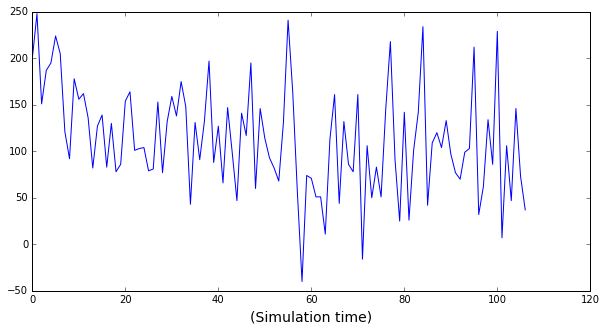

In [21]:
profits = firms[0].profit_history

fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(range(len(profits)), profits)

ax1.set_xlabel('(Simulation time)', fontsize='14')